In [257]:
import pandas as pd 

In [258]:
# Dietary Guidelines Major Takeaways
# - added sugars < 10% of calories per day 
# - saturated fat < 10% of calories per day
# - sodium intake < 2,300mg per day
# - 85% of daily calories need to be nutrient rich food
# - choose a variety of options from each food group
# - meet nutritional needs 
# - rich in nutrients

# Conclusion

# Show which cereals have 
# - low: sugars, saturated fat, and sodium intake
# - high: vitamins, potassium, fiber, protein

In [259]:
#Read in data from cereal.csv file
df = pd.read_csv('./cereal.csv', delimiter=',', nrows = None)
df.dataframeName = 'cereal.csv'
numRows, numColumns = df.shape
print(f'There are {numRows} rows and {numColumns} columns')

There are 77 rows and 16 columns


In [260]:
#Function that gets the index of each item in a sorted list and adds it to the RankPoints for the respective item
def rankTally(sortedList, dataframe):
    i = 1
    for index, row in sortedList.iterrows():
        dataframe.at[index, 'RankPoints'] += i
        i += 1
    return dataframe

#Function to sort the cereals by sugars, fat, sodium, protein, potassium, fiber, and vitamins. Calculate their rank based on these qualities
def rankCerealsTableView(df):
    #Adding column to data frame to keep track of RankPoints, cereals with the lowest amount of RankPoints are deemed best cereals in regards to dietary guidelines (similar to golfing score style, lowest score is winner)
    df['RankPoints'] = [0 for x in range(len(df))]

    #Cereals are sorted in ascending order by sugars, fat, and sodium as these are negative qualities for a cereal and would want to minimize them in a daily diet. 
    sortedSugars = df.sort_values(by="sugars", ascending=True)
    sortedFat = df.sort_values(by="fat", ascending=True)
    sortedSodium = df.sort_values(by="sodium", ascending=True)

    #Cereals are sorted in descending order by protein, potassium, fiber, and vitamins as these are positive qualities that you would want to maxmize in a daily diet
    sortedProtein = df.sort_values(by="protein", ascending=False)
    sortedPotass = df.sort_values(by="potass", ascending=False)
    sortedFiber = df.sort_values(by="fiber", ascending=False)
    sortedVitamins = df.sort_values(by="vitamins", ascending=False)

    #Now that we have all cereals sorted by different qualities we will get their index in each sorted list and accumulate it to their RankPoints
    df = rankTally(sortedSugars, df)
    df = rankTally(sortedFat, df)
    df = rankTally(sortedSodium, df)
    df = rankTally(sortedProtein, df)
    df = rankTally(sortedPotass, df)
    df = rankTally(sortedFiber, df)
    df = rankTally(sortedVitamins, df)

    ## Note: Abstained from sorting by calories, weight, and cups as there is 

    #Once all rank points have been accumulated we now sort the dataframe by Rank Points in ascending order to determine the 5 best cereals to reccomend
    sortedRank = df.sort_values(by="RankPoints", ascending=True)
    return sortedRank

    



In [261]:
# The 5 cereals I would reccomend based on the ranking calculations would be
#Table view of top 5 reccomended cereals
reccomendedCereals = rankCerealsTableView(df).head(5)
reccomendedCereals

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,RankPoints
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,115
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,132
64,Shredded Wheat 'n'Bran,N,C,90,3,0,0,4.0,19.0,0,140,0,1,1.0,0.67,74.472949,160
50,Nutri-grain Wheat,K,C,90,3,0,170,3.0,18.0,2,90,25,3,1.0,1.00,59.642837,165
43,Maypo,A,H,100,4,1,0,0.0,16.0,3,95,25,2,1.0,1.00,54.850917,169


<Axes: xlabel='name'>

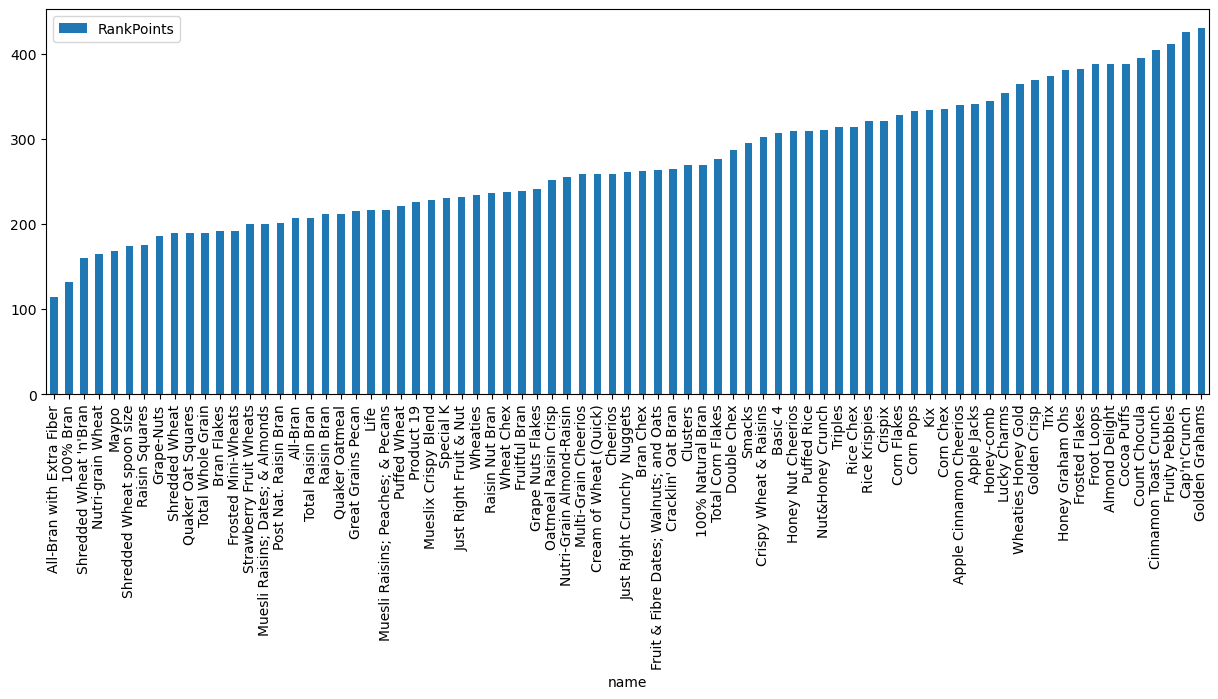

In [262]:
#Bar graph view of all cereals organized by RankPoints
rankCerealsTableView(df).plot(x='name', y='RankPoints',figsize=(15,5), kind='bar')

<Axes: xlabel='name'>

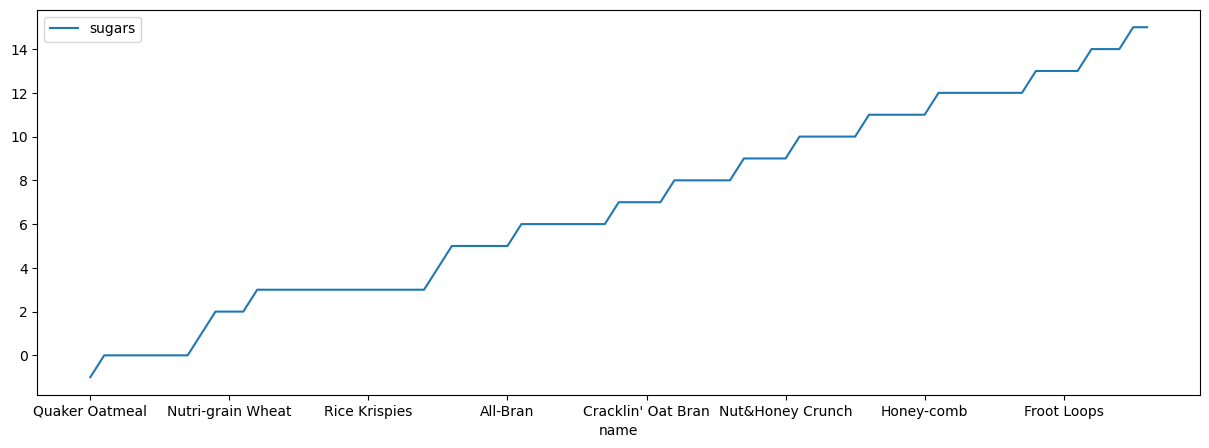

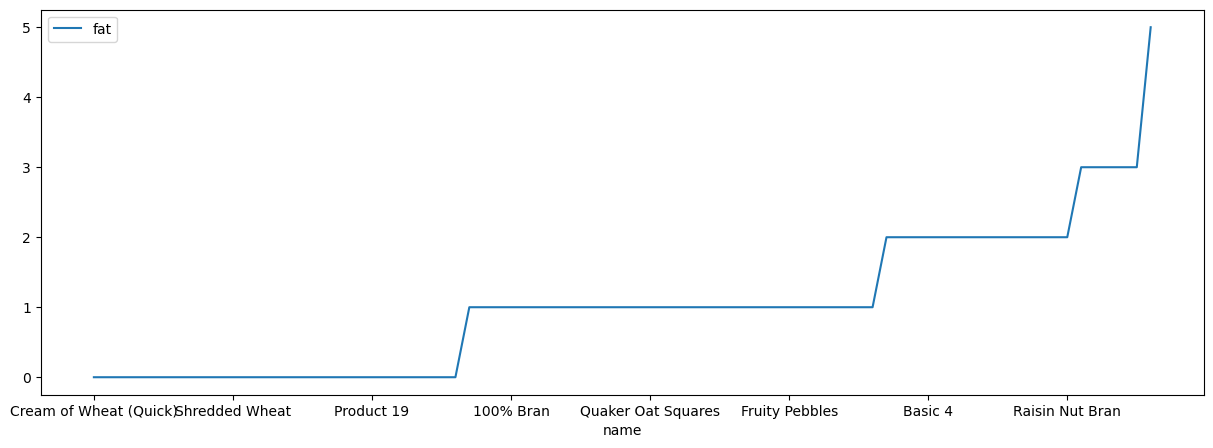

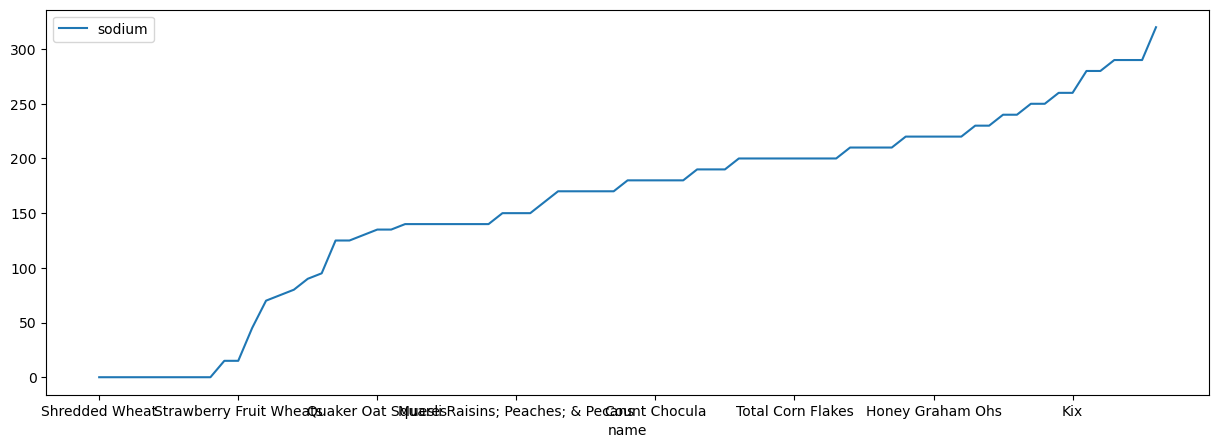

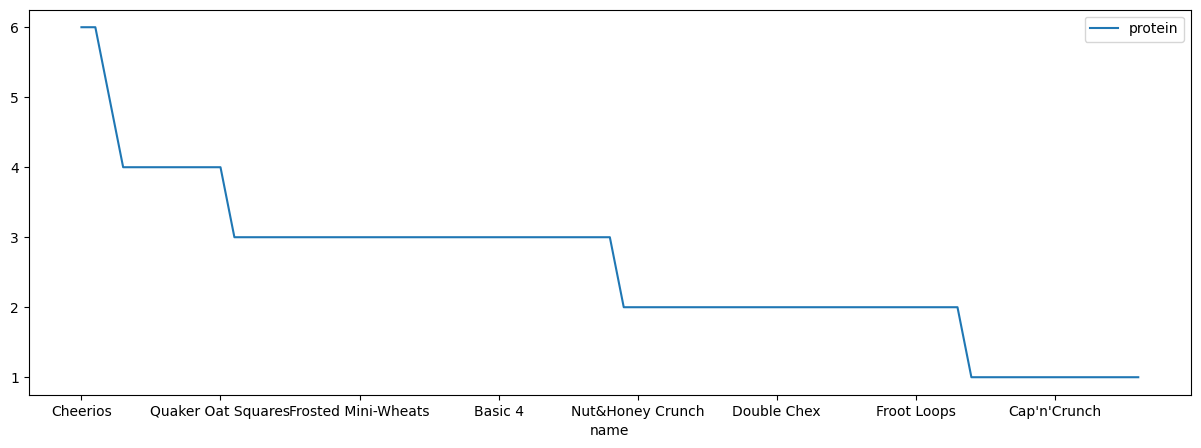

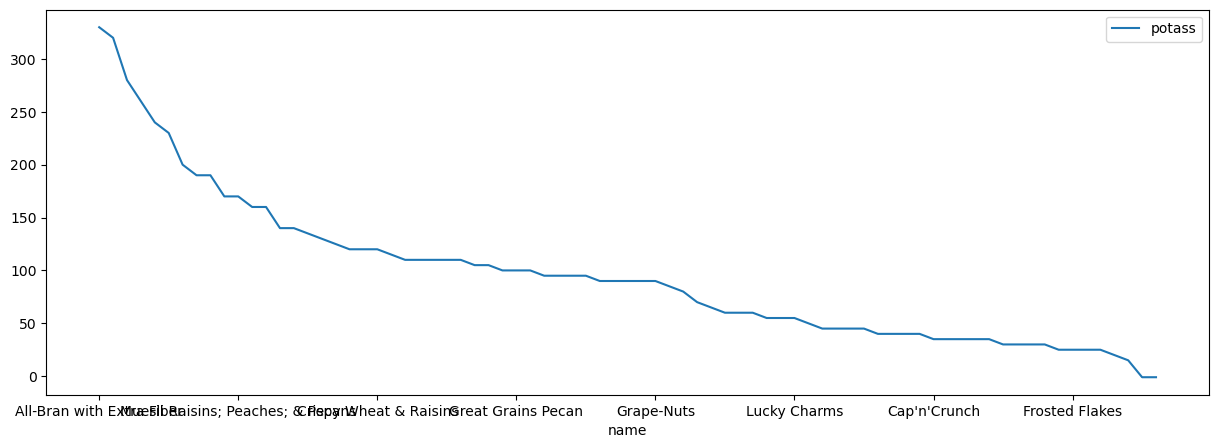

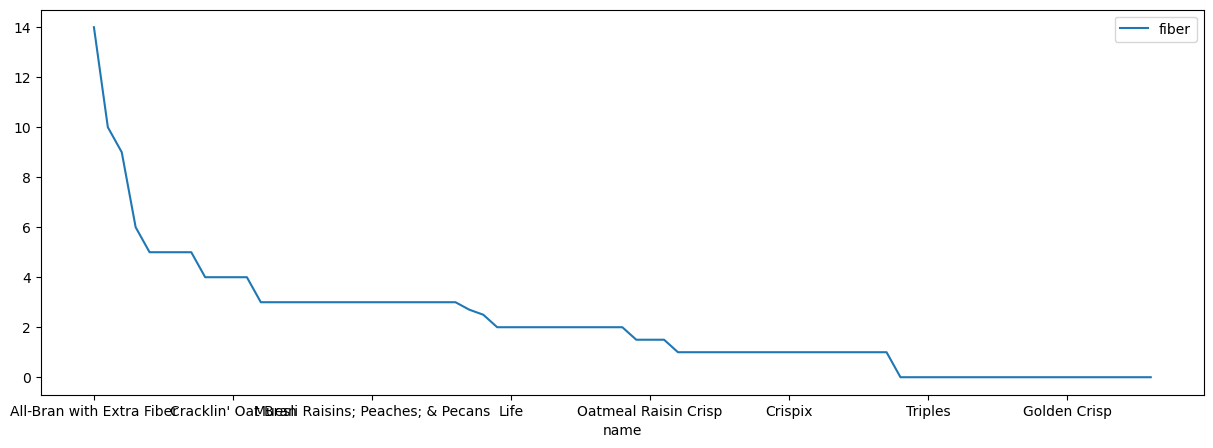

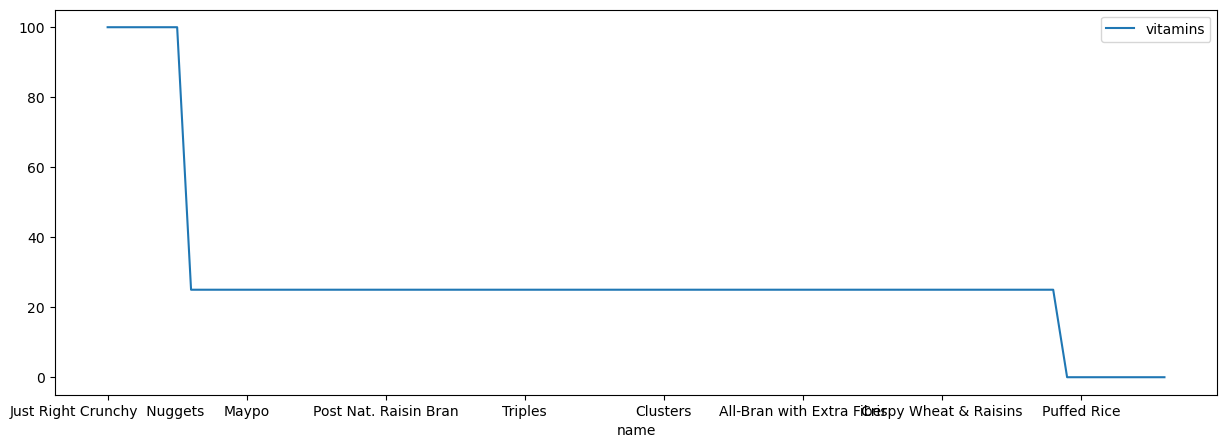

In [263]:
#Line graph view of each quality (sugars, fat, sodium, protein, potass, fiber, vitamins) showing best to worst cereals by each respective category

#For sugars, fat, and sodium the best cereals by these qualities are ranked lowest to highest in quantity 
sortedSugars = df.sort_values(by="sugars", ascending=True)
sortedFat = df.sort_values(by="fat", ascending=True)
sortedSodium = df.sort_values(by="sodium", ascending=True)

#For protein, potassium, fiber, and vitamins the best cereals by these qualities are ranked highest to lowest in quantity
sortedProtein = df.sort_values(by="protein", ascending=False)
sortedPotass = df.sort_values(by="potass", ascending=False)
sortedFiber = df.sort_values(by="fiber", ascending=False)
sortedVitamins = df.sort_values(by="vitamins", ascending=False)

#Plot by each respective category
sortedSugars.plot(kind='line', figsize=(15,5), x='name', y='sugars')
sortedFat.plot(kind='line', figsize=(15,5), x='name', y='fat')
sortedSodium.plot(kind='line', figsize=(15,5), x='name', y='sodium')
sortedProtein.plot(kind='line', figsize=(15,5), x='name', y='protein')
sortedPotass.plot(kind='line', figsize=(15,5), x='name', y='potass')
sortedFiber.plot(kind='line', figsize=(15,5), x='name', y='fiber')
sortedVitamins.plot(kind='line', figsize=(15,5), x='name', y='vitamins')
